# Optimizing Print Bed Temperature Distribution 

#### Introduction

The aerospace manufactoring company utilizes advanced additive manufacturing techniques, specifically wire arc DED, for the production of critical aerospace components. A recurrent challenge in this process is the warping and distortion of parts due to uneven heat distribution and buildup during the metal deposition process. This can significantly affect the structural integrity and dimensional accuracy of the printed components.

#### Problem Statement

During the wire arc DED process, the company faces issues where the deposited metal aluminum wire, upon melting and solidifying, undergoes warping and distortion. This is largely attributed to the uneven heat buildup across the print bed, resulting in differential cooling rates and subsequent thermal stress within the material.

#### Proposed Solution

The proposed solution involves the development and implementation of a reverse solver algorithm. This computational strategy aims to model the expected warping and distortion based on the thermal history of the deposition process. By understanding these distortions in advance, it becomes possible to adjust the printing parameters to "pre-correct" the shape, ensuring that the final product adheres to the desired specifications.

#### Data Simulation

For the initial phase, simulated data representing the warping and distortion effects in printed components will be generated. This data will mimic the real-world outcomes observed in the company's manufacturing process, accounting for variables such as temperature gradients, cooling rates, and material properties.


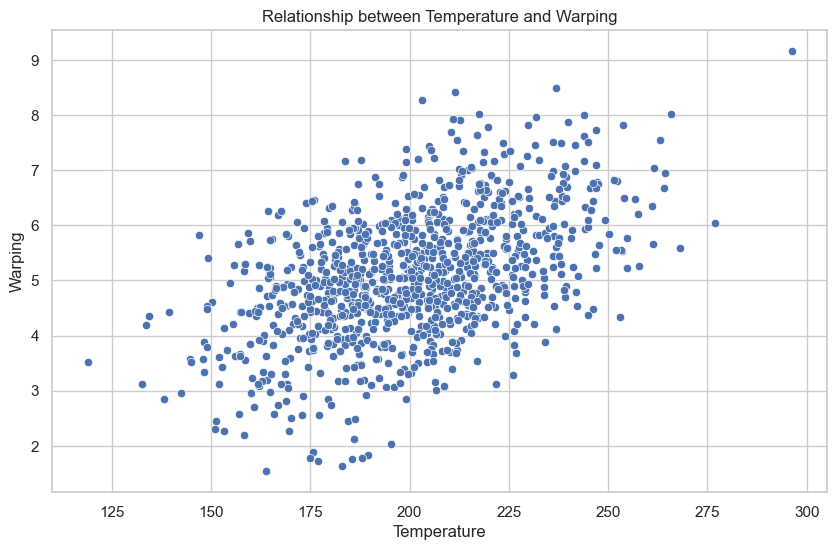

In [15]:
# Simulate dataset for demonstration purposes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

temperature_data = np.random.normal(loc=200, scale=25, size=1000)  # Generate temperature
warping_data = np.random.normal(loc=0, scale=1, size=1000) + temperature_data * 0.025  # Assume warping increases with temperature
print_speed_data = np.random.normal(loc=50, scale=5, size=1000)  # Generate print speed
layer_height_data = np.random.uniform(low=0.1, high=0.3, size=1000)  # Generate layer height
material_feed_rate_data = np.random.normal(loc=25, scale=2, size=1000)  # Generate feed rate

# Create a DataFrame
df = pd.DataFrame({
    'Temperature': temperature_data,
    'Warping': warping_data,
    'Print_Speed' : print_speed_data,
    'Layer_Height' : layer_height_data,
    'Material_Feed_Rate' : material_feed_rate_data
})

# Plot Wrapping and Temperature Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Warping', data=df)
plt.title('Relationship between Temperature and Warping')
plt.xlabel('Temperature')
plt.ylabel('Warping')
plt.show()

In [6]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
features = df[['Temperature', 'Print_Speed', 'Layer_Height', 'Material_Feed_Rate']].values
target = df['Warping'].values.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)